# Installing Libraries

In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#ML Model Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Intro to Data

In [2]:
df = pd.read_csv("C:\\Users\\koush\\Downloads\\credit card fraud detection\\PS_20174392719_1491204439457_log.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [6]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

## Handling the Null Values

In [7]:
if df.isnull().values.any():
    print('There are some missing values in this dataset\n')
    df.dropna(inplace=True)
    print('Shape : ', data.shape) 
else:
    print('GREAT, There is no missing values in this dataset')

GREAT, There is no missing values in this dataset


# Handling Outliers

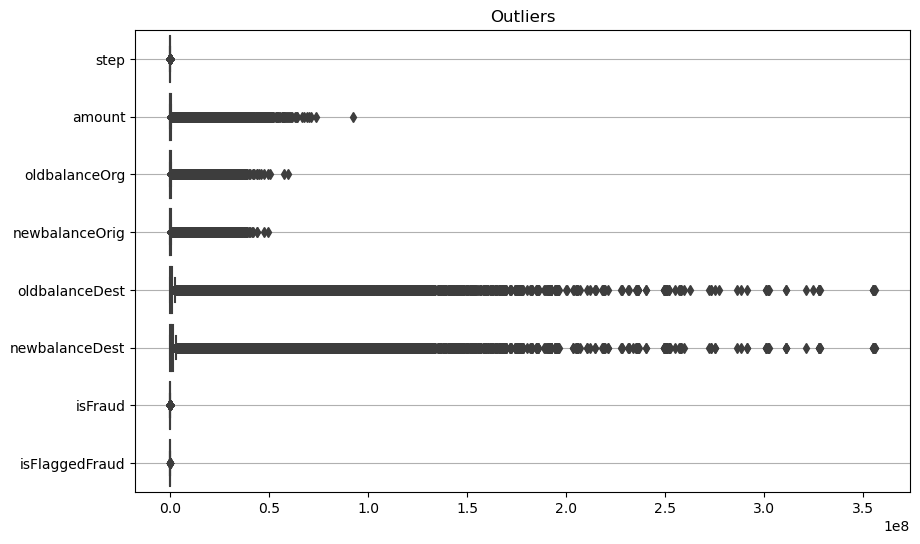

In [8]:
# Finding Outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h') # horizontal
plt.title('Outliers')
plt.grid(axis='y')
plt.show()

In [9]:
##labels in type feature
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
#counting the unique values
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

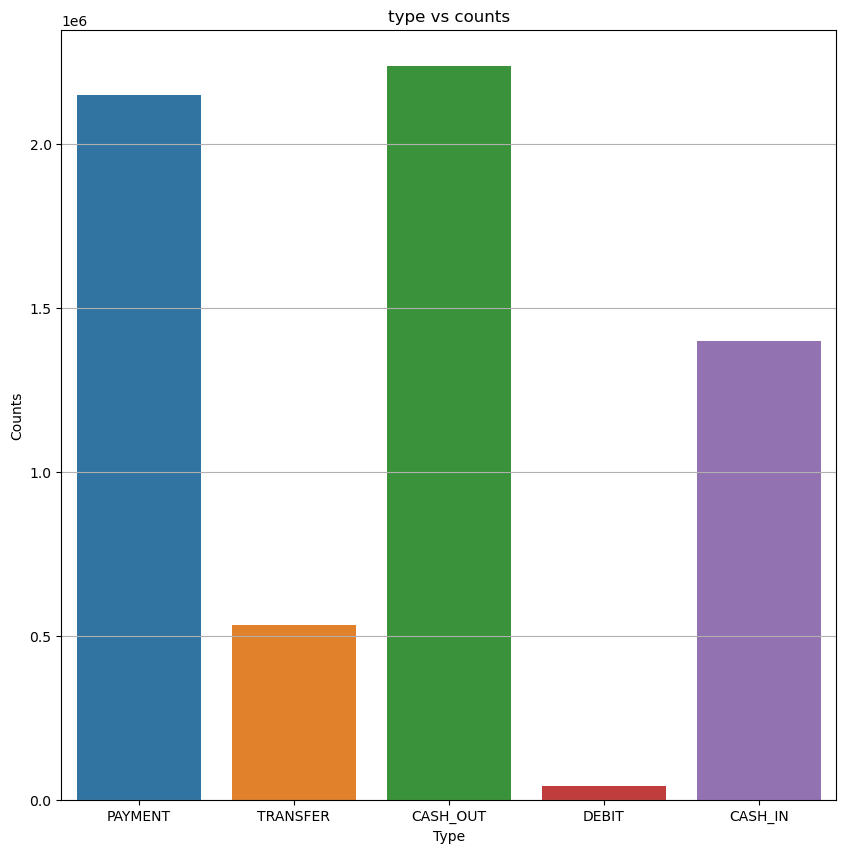

In [11]:
#plots

plt.figure(figsize=(10,10))
plt.title('type vs counts')
sns.countplot(data=df,x='type')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=1)
plt.show()

# Label Encoding

In [12]:
df['type'].replace({'CASH_OUT':0, 'PAYMENT':1,'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4},inplace=True)

In [13]:
df['type'].value_counts()

0    2237500
1    2151495
2    1399284
3     532909
4      41432
Name: type, dtype: int64

In [14]:
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,3,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,0,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,1,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,1,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,1,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,4,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


# EDA of categories of the "isFraud" feature

In [15]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [16]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

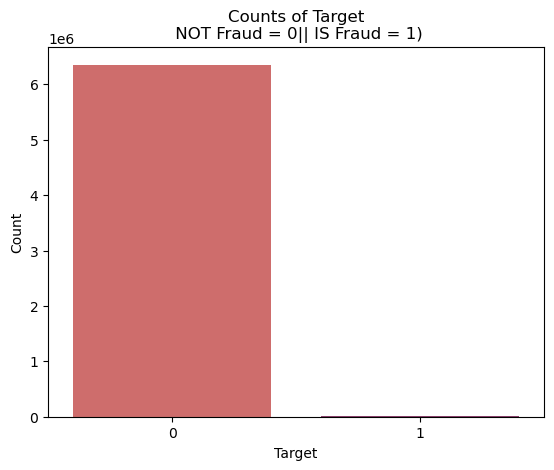

In [17]:
Target_counts = df['isFraud'].value_counts()

#Plot
sns.barplot(x=Target_counts.index, y=Target_counts.values, palette='flare')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Counts of Target\n NOT Fraud = 0|| IS Fraud = 1)')
plt.xticks()
plt.show()

# Drop unnecessary columns

In [18]:
df.drop(['nameOrig','nameDest'], axis=1, inplace=True)

In [19]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

# Feature Extraction

In [20]:
# Finding correlation

df.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.012627,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.012627,1.000000,0.198987,0.260418,0.270669,0.066255,0.079111,0.016171,0.003144
amount,0.022373,0.198987,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,0.260418,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,0.270669,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.066255,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.079111,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.016171,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.003144,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


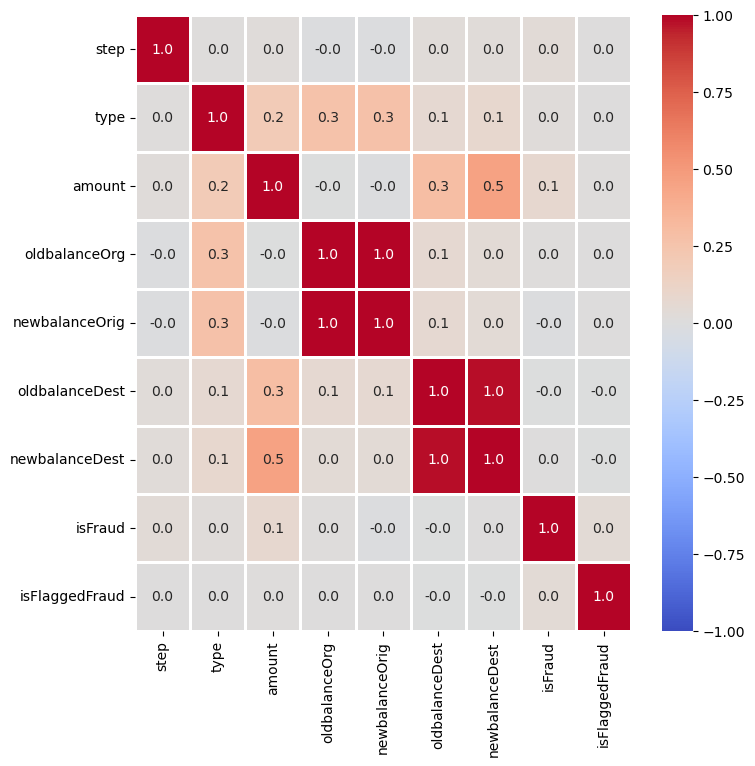

In [21]:
# visualization of Correlation
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), 
            annot=True, 
            linewidths=0.9, 
            fmt=".1f", vmin=-1, vmax=1,
            cmap='coolwarm')
plt.show()

# Dropping unnecessary Columns based on correlation

In [22]:
df.drop(['newbalanceOrig', 'oldbalanceDest'], axis=1, inplace=True)


In [23]:
df.columns


Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(3), int64(4)
memory usage: 339.8 MB


# Splitting the data between train and target

In [25]:
# X Data
x = df.drop(['isFraud'], axis=1)
print('X shape is : ' , x.shape)
print()

# y Data
y = df['isFraud']
print('Y shape is : ' , y.shape)

X shape is :  (6362620, 6)

Y shape is :  (6362620,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)

# Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4453834, 6)
X_test shape is  (1908786, 6)
y_train shape is  (4453834,)
y_test shape is  (1908786,)


In [27]:
# Standardization (Z-Score Normalization) 
# StandardScaler for Data

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Classification

In [28]:
Model_LR = LogisticRegression()
Model_LR.fit(X_train_scaled, y_train)
y_pred_LR = Model_LR.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_LR.score(X_train_scaled, y_train)
Test_Accuracy = Model_LR.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.87 %
Testing accuracy: 99.87 %


# Confusion Matrix

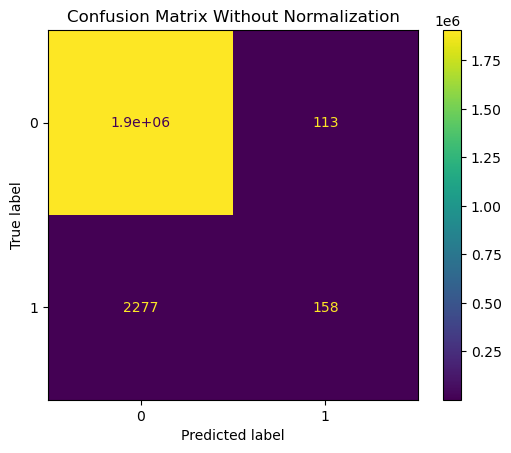

In [29]:
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_LR)
ConfusionMatrixDisplay(CM, display_labels=df['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [30]:
print(classification_report(y_test, y_pred_LR))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.58      0.06      0.12      2435

    accuracy                           1.00   1908786
   macro avg       0.79      0.53      0.56   1908786
weighted avg       1.00      1.00      1.00   1908786



In [31]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_LR = accuracy_score(y_test, y_pred_LR)


# Precision = TP / (TP + FP)
Precision_LR = precision_score(y_test, y_pred_LR)


# Recall = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_pred_LR)


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_pred_LR)
print(f'F1 Score : {F1_Score_LR * 100 : .2f} %\n')


ROC_AUC_LR = roc_auc_score(y_test, y_pred_LR)


print(f'Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')
print(f'Precision Score : {Precision_LR * 100 : .2f} %\n')
print(f'Recall Score : {Recall_LR * 100 : .2f} %\n')
print(f'AUC_ROC : {ROC_AUC_LR * 100 : .2f} %\n')


F1 Score :  11.68 %

Accuracy Score :  99.87 %

Precision Score :  58.30 %

Recall Score :  6.49 %

AUC_ROC :  53.24 %



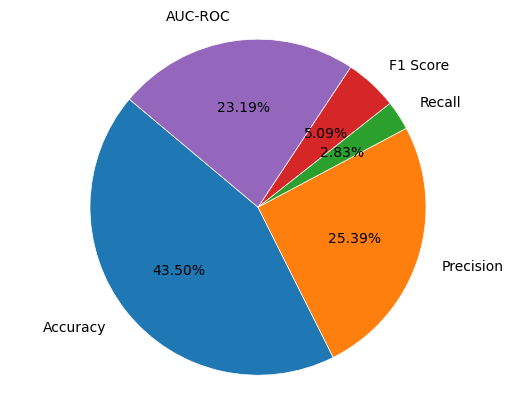

In [32]:
Scores = [Accuracy_LR, Precision_LR, Recall_LR, F1_Score_LR, ROC_AUC_LR]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.pie(Scores, labels=Score_Names, 
        autopct='%1.2f%%', 
        startangle=140, 
        labeldistance=1.15,
       wedgeprops = { 'linewidth' : .5, 'edgecolor' : 'white' })
plt.axis('equal')
plt.show()

# "Decision Tree" Classification

In [33]:
Model_DT = DecisionTreeClassifier()
Model_DT.fit(X_train_scaled, y_train)
y_pred_DT = Model_DT.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_DT.score(X_train_scaled, y_train)
Test_Accuracy = Model_DT.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')


Training accuracy: 100.00 %
Testing accuracy: 99.95 %


# The Evaluation

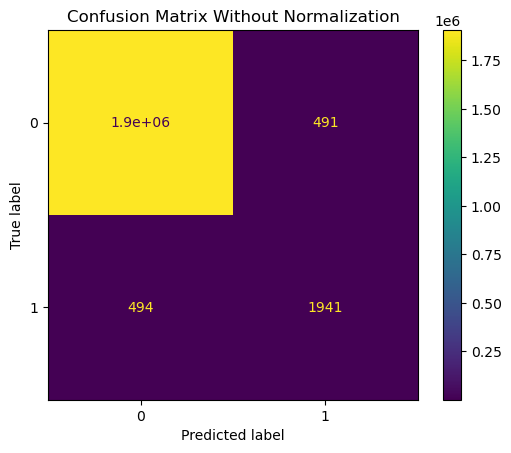

In [34]:
# Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_DT)
ConfusionMatrixDisplay(CM, display_labels=df['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [35]:
print(classification_report(y_test, y_pred_DT))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.80      0.80      0.80      2435

    accuracy                           1.00   1908786
   macro avg       0.90      0.90      0.90   1908786
weighted avg       1.00      1.00      1.00   1908786



In [36]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_DT = accuracy_score(y_test, y_pred_DT)


# Precision = TP / (TP + FP)
Precision_DT = precision_score(y_test, y_pred_DT)


# Recall = TP / (TP + FN)
Recall_DT = recall_score(y_test, y_pred_DT)


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_DT = f1_score(y_test, y_pred_DT)


ROC_AUC_DT = roc_auc_score(y_test, y_pred_DT)

print(f'Accuracy Score : {Accuracy_DT * 100 : .2f} %\n')
print(f'Precision Score : {Precision_DT * 100 : .2f} %\n')
print(f'Recall Score : {Recall_DT * 100 : .2f} %\n')
print(f'F1 Score : {F1_Score_DT * 100 : .2f} %\n')
print(f'AUC_ROC : {ROC_AUC_DT * 100 : .2f} %\n')


Accuracy Score :  99.95 %

Precision Score :  79.81 %

Recall Score :  79.71 %

F1 Score :  79.76 %

AUC_ROC :  89.84 %



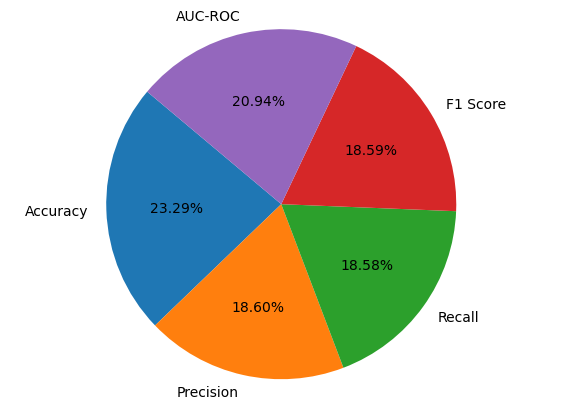

In [37]:
Scores = [Accuracy_DT, Precision_DT, Recall_DT, F1_Score_DT, ROC_AUC_DT]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

# Naive Bayes Classification

In [38]:
Model_NB = GaussianNB()
Model_NB.fit(X_train_scaled, y_train)
y_pred_NB = Model_NB.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_NB.score(X_train_scaled, y_train)
Test_Accuracy = Model_NB.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.62 %
Testing accuracy: 99.61 %


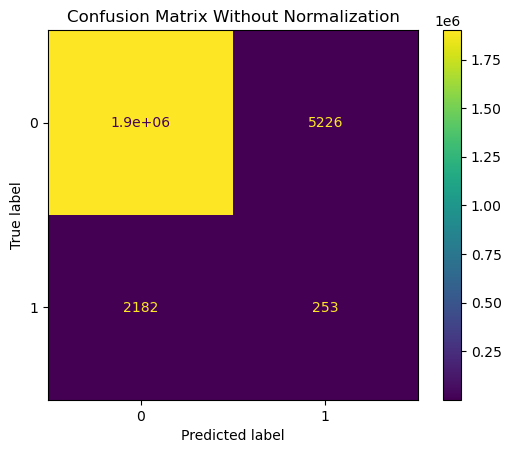

In [39]:
# Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_NB)
ConfusionMatrixDisplay(CM, display_labels=df['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [40]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.05      0.10      0.06      2435

    accuracy                           1.00   1908786
   macro avg       0.52      0.55      0.53   1908786
weighted avg       1.00      1.00      1.00   1908786



In [41]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_NB = accuracy_score(y_test, y_pred_NB)


# Precision = TP / (TP + FP)
Precision_NB = precision_score(y_test, y_pred_NB)


# Recall = TP / (TP + FN)
Recall_NB = recall_score(y_test, y_pred_NB)


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_NB = f1_score(y_test, y_pred_NB)


ROC_AUC_NB = roc_auc_score(y_test, y_pred_NB)


print(f'Accuracy Score : {Accuracy_NB * 100 : .2f} %\n')
print(f'Precision Score : {Precision_NB * 100 : .2f} %\n')
print(f'Recall Score : {Recall_NB * 100 : .2f} %\n')
print(f'F1 Score : {F1_Score_NB * 100 : .2f} %\n')
print(f'AUC_ROC : {ROC_AUC_NB * 100 : .2f} %\n')

Accuracy Score :  99.61 %

Precision Score :  4.62 %

Recall Score :  10.39 %

F1 Score :  6.39 %

AUC_ROC :  55.06 %



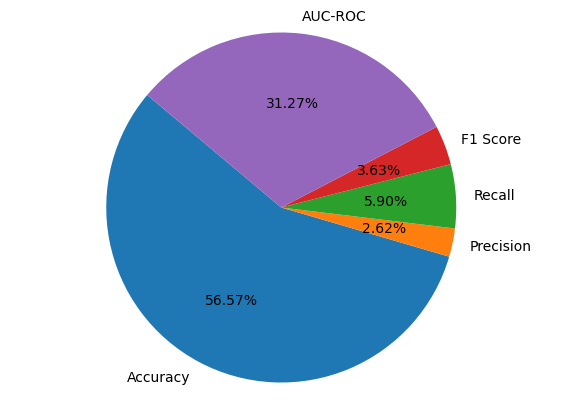

In [42]:
Scores = [Accuracy_NB, Precision_NB, Recall_NB, F1_Score_NB, ROC_AUC_NB]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

In [43]:
evaluation = pd.DataFrame({'Classification Model': ['Logistic Regression','Decision Tree', 'Naive Bayes'],
                           'Accuracy Rate': [(Accuracy_LR*100).round(2), (Accuracy_DT*100).round(2), (Accuracy_NB*100).round(2)]})

evaluation

,Classification Model,Accuracy Rate
0,Logistic Regression,99.87
1,Decision Tree,99.95
2,Naive Bayes,99.61


## All the classification models come with very good accuracy rate while Decision tree comes with the highest